<a href="https://colab.research.google.com/github/mrneerajnegi/Data-Science-Projects/blob/Face_swapping/Face_Swapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [451]:
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt

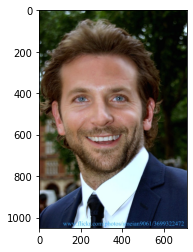

In [452]:
bradley=cv2.cvtColor(cv2.imread("./bradley_cooper.jpg"),cv2.COLOR_BGR2RGB)
bradleyGray=cv2.cvtColor(cv2.imread("./bradley_cooper.jpg"),cv2.COLOR_BGR2GRAY)
bradleyMask=np.zeros_like(bradleyGray)
plt.imshow(bradley)

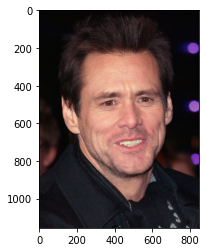

In [453]:
jim=cv2.cvtColor(cv2.imread("./jim_carrey.jpg"),cv2.COLOR_BGR2RGB)
jimGray=cv2.cvtColor(cv2.imread("./jim_carrey.jpg"),cv2.COLOR_BGR2GRAY)
jimMask=np.zeros_like(jimGray)
plt.imshow(jim)

In [454]:
detector=dlib.get_frontal_face_detector()
predictor=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces=detector(bradley)

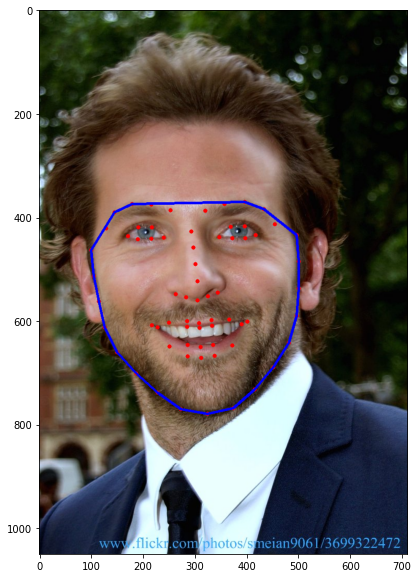

In [455]:
bradley_copy=bradley.copy()
for face in faces:
  landmarks=predictor(bradleyGray,face)
  landmark_points=[]
  for i in range(0,68):
    x=landmarks.part(i).x
    y=landmarks.part(i).y  
    landmark_points.append((x,y))
    cv2.circle(bradley_copy,(x,y),4,(255,0,0),-1)
  points=np.array(landmark_points,np.int32)
  convexHull=cv2.convexHull(points)
  cv2.polylines(bradley_copy,[convexHull],True,(0,0,255),3)
plt.figure(figsize=(12,10))
plt.imshow(bradley_copy)

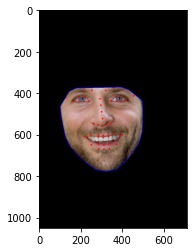

In [456]:
cv2.fillConvexPoly(bradleyMask,convexHull,255)
faceImage1=cv2.bitwise_and(bradley_copy,bradley_copy,mask=bradleyMask)
plt.imshow(faceImage1)

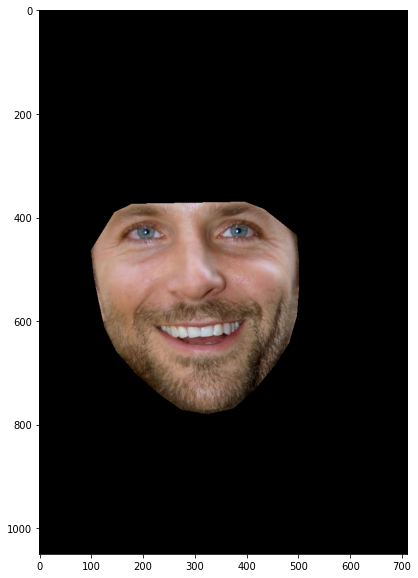

In [457]:
bradley_copy=bradley.copy()
for face in faces:
  landmarks=predictor(bradleyGray,face)
  landmark_points=[]
  for i in range(0,68):
    x=landmarks.part(i).x
    y=landmarks.part(i).y  
    landmark_points.append((x,y))
    # cv2.circle(bradley_copy,(x,y),4,(255,0,0),-1)
  points=np.array(landmark_points,np.int32)
  convexHull=cv2.convexHull(points)
  # cv2.polylines(bradley,[convexHull],True,(0,0,255),3)
plt.figure(figsize=(12,10))
# plt.imshow(bradley)
cv2.fillConvexPoly(bradleyMask,convexHull,255)
faceImage1=cv2.bitwise_and(bradley_copy,bradley_copy,mask=bradleyMask)
plt.imshow(faceImage1)

In [458]:
#Delaunay Triangulation

In [459]:
bradley_copy=bradley.copy()
for face in faces:
  landmarks=predictor(bradleyGray,face)
  landmark_points=[]
  for i in range(0,68):
    x=landmarks.part(i).x
    y=landmarks.part(i).y  
    landmark_points.append((x,y))
    cv2.circle(bradley_copy,(x,y),4,(255,0,0),-1)
  points=np.array(landmark_points,np.int32)
  convexHull=cv2.convexHull(points)
  cv2.polylines(bradley_copy,[convexHull],True,(0,0,255),3)
plt.figure(figsize=(12,10))
# plt.imshow(bradley)
cv2.fillConvexPoly(bradleyMask,convexHull,255)
faceImage1=cv2.bitwise_and(bradley_copy,bradley_copy,mask=bradleyMask)

<Figure size 864x720 with 0 Axes>

(100, 370, 401, 410)


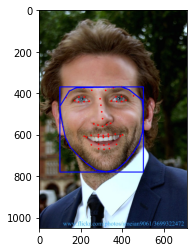

In [460]:
rectangle=cv2.boundingRect(convexHull) #make rectangle around polygon
print(rectangle)
x,y,w,h  = rectangle
cv2.rectangle(bradley_copy,(x,y),((x+w),(y+h)),(0,0,255),4)
plt.imshow(bradley_copy)

In [461]:
#subdiv takes rectangle to creaate traingles
subdiv=cv2.Subdiv2D(rectangle)
subdiv.insert(landmark_points)
triangles=subdiv.getTriangleList()

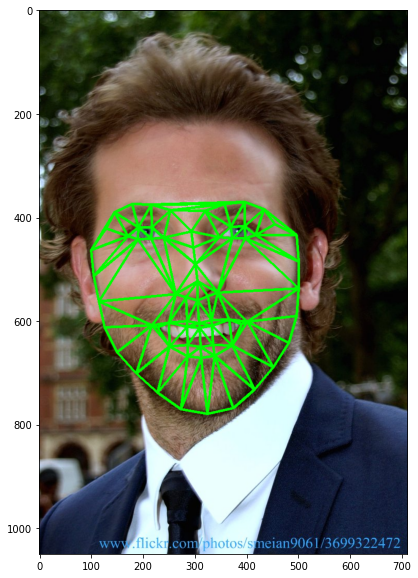

In [462]:
bradley_copy=bradley.copy()
plt.figure(figsize=(12,10))
for t in triangles:
  pt1=(t[0],t[1])
  pt2=(t[2],t[3])
  pt3=(t[4],t[5])
  #we need to convert float values to int to put 
  cv2.line(bradley_copy,(pt1),(pt2),(0,255,0),3)
  cv2.line(bradley_copy,(pt2),(pt3),(0,255,0),3)
  cv2.line(bradley_copy,(pt1),(pt3),(0,255,0),3)
plt.imshow(bradley_copy)

In [463]:
#Once we know the indexes of the triangles, we can find the same triangles starting from the 
#landmarks points of the second face. So now we find the landmarks in the second face.

<Figure size 864x720 with 0 Axes>

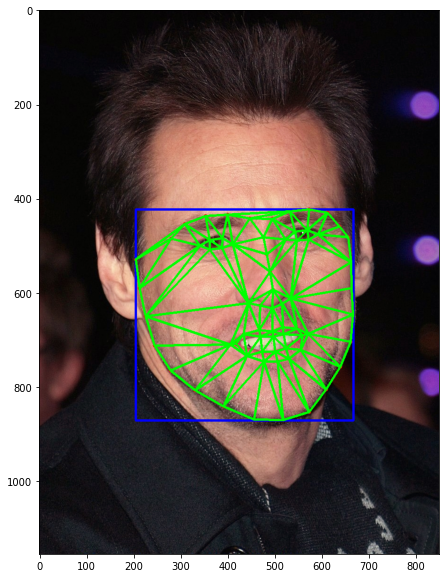

In [464]:
#lets apply Delaunay Triangulation to second image
faces_jim=detector(jim)
jim_copy=jim.copy()
for face in faces_jim:
  landmarks_jim=predictor(jimGray,face)
  landmark_points_jim=[]
  for i in range(0,68):
    x=landmarks_jim.part(i).x
    y=landmarks_jim.part(i).y  
    landmark_points_jim.append((x,y))
    cv2.circle(jim_copy,(x,y),4,(255,0,0),-1)
  points_jim=np.array(landmark_points_jim,np.int32)
  convexHull_jim=cv2.convexHull(points_jim)
  cv2.polylines(jim_copy,[convexHull_jim],True,(0,0,255),1)
plt.figure(figsize=(12,10))
cv2.fillConvexPoly(jimMask,convexHull_jim,255)
faceImage2=cv2.bitwise_and(jim_copy,jim_copy,mask=jimMask)

rectangle_jim=cv2.boundingRect(convexHull_jim) #make rectangle around polygon
x,y,w,h  = rectangle_jim
cv2.rectangle(jim_copy,(x,y),((x+w),(y+h)),(0,0,255),4)

#subdiv takes rectangle to creaate traingles
subdiv=cv2.Subdiv2D(rectangle_jim)
subdiv.insert(landmark_points_jim)
triangles_jim=subdiv.getTriangleList()
plt.figure(figsize=(12,10))
for t in triangles_jim:
  pt1=(t[0],t[1])
  pt2=(t[2],t[3])
  pt3=(t[4],t[5])
  #we need to convert float values to int to put 
  cv2.line(jim_copy,(pt1),(pt2),(0,255,0),3)
  cv2.line(jim_copy,(pt2),(pt3),(0,255,0),3)
  cv2.line(jim_copy,(pt1),(pt3),(0,255,0),3)
plt.imshow(jim_copy)


In [465]:
#We can now draw the triangles on the second face with same index in first image
#lets find the index of triangle from first image

In [466]:
plt.figure(figsize=(12,10))
indexes_triangles = []
for t in triangles:
  pt1=(t[0],t[1])
  pt2=(t[2],t[3])
  pt3=(t[4],t[5])
  pt1_index=np.where((points==pt1).all(axis=1))[0][0]
  pt2_index=np.where((points==pt2).all(axis=1))[0][0]
  pt3_index=np.where((points==pt3).all(axis=1))[0][0]
  if pt1_index is not None and pt2_index is not None and pt3_index is not None:
        triangle = [pt1_index, pt2_index, pt3_index]
        indexes_triangles.append(triangle)
print(indexes_triangles)

[[36, 0, 17], [0, 36, 1], [7, 57, 8], [57, 7, 58], [30, 35, 34], [35, 30, 29], [2, 1, 41], [35, 29, 47], [3, 2, 48], [61, 62, 67], [62, 61, 51], [4, 3, 48], [67, 62, 66], [5, 4, 48], [10, 56, 55], [56, 10, 9], [6, 5, 59], [31, 49, 48], [49, 31, 32], [7, 6, 58], [31, 29, 30], [29, 31, 39], [9, 8, 56], [21, 27, 39], [27, 21, 22], [11, 10, 55], [44, 47, 43], [47, 44, 46], [12, 11, 54], [40, 38, 39], [38, 40, 37], [13, 12, 54], [37, 40, 41], [14, 13, 54], [37, 18, 19], [18, 37, 36], [15, 14, 46], [39, 27, 28], [16, 15, 45], [20, 23, 21], [23, 20, 24], [0, 18, 17], [18, 36, 17], [37, 19, 20], [47, 29, 42], [22, 21, 23], [20, 21, 38], [42, 29, 28], [42, 22, 43], [22, 42, 27], [27, 42, 28], [44, 25, 45], [25, 44, 24], [22, 23, 43], [43, 23, 24], [25, 16, 26], [16, 45, 26], [25, 26, 45], [2, 41, 31], [1, 36, 41], [2, 31, 48], [53, 35, 54], [35, 53, 52], [49, 32, 50], [28, 29, 39], [54, 55, 64], [55, 54, 11], [49, 59, 60], [59, 49, 61], [51, 33, 52], [33, 51, 50], [31, 30, 32], [56, 8, 57], [32

<Figure size 864x720 with 0 Axes>

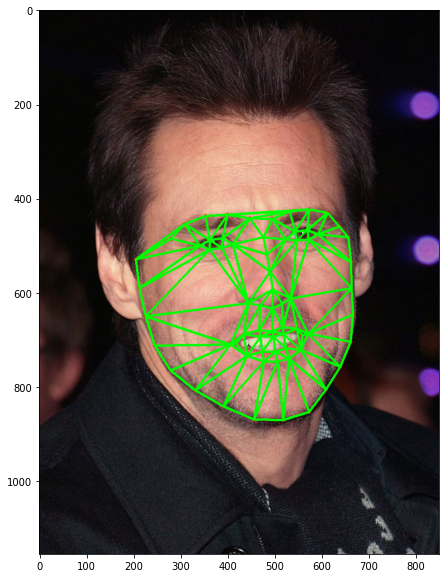

In [467]:
#lets apply Delaunay Triangulation to second image
jim_copy=jim.copy()
for face in faces_jim:
  landmarks_jim=predictor(jimGray,face)
  landmark_points_jim=[]
  for i in range(0,68):
    x=landmarks_jim.part(i).x
    y=landmarks_jim.part(i).y  
    landmark_points_jim.append((x,y))
    cv2.circle(jim_copy,(x,y),4,(255,0,0),-1)
plt.figure(figsize=(12,10))
for pts in indexes_triangles:
    cv2.line(jim_copy,landmark_points_jim[pts[0]],landmark_points_jim[pts[1]],(0,255,0),3)
    cv2.line(jim_copy,landmark_points_jim[pts[1]],landmark_points_jim[pts[2]],(0,255,0),3)
    cv2.line(jim_copy,landmark_points_jim[pts[0]],landmark_points_jim[pts[2]],(0,255,0),3)

plt.imshow(jim_copy)


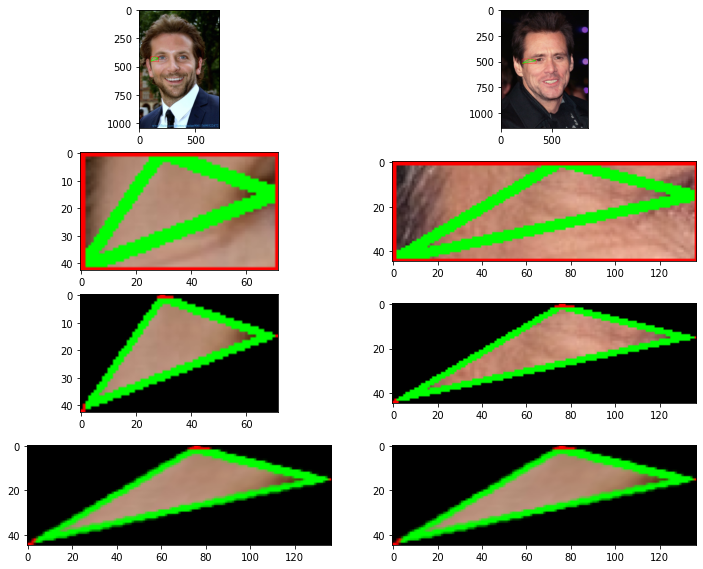

In [468]:
#lets do for firs traingle
jim_copy=jim.copy()
bradley_copy=bradley.copy()
plt.figure(figsize=(12,10))

for pts in indexes_triangles:
  #first image
    pt1_im1=landmark_points[pts[0]]
    pt2_im1=landmark_points[pts[1]]
    pt3_im1=landmark_points[pts[2]]
    cv2.line(bradley_copy,pt1_im1,pt2_im1,(0,255,0),3)
    cv2.line(bradley_copy,pt2_im1,pt3_im1,(0,255,0),3)
    cv2.line(bradley_copy,pt3_im1,pt1_im1,(0,255,0),3)
    triangle1=np.array([pt1_im1,pt2_im1,pt3_im1],np.int32)
    rec1=cv2.boundingRect(triangle1)
    x,y,w,h = rec1
    cv2.rectangle(bradley_copy,(x,y),(x+w,y+h),(255,0,0),2)
    rect1_image=bradley_copy[y:y+h,x:x+w]

    points1=np.array([
       [pt1_im1[0]-x,pt1_im1[1]-y,],
       [pt2_im1[0]-x,pt2_im1[1]-y,],
       [pt3_im1[0]-x,pt3_im1[1]-y,],   
    ],np.int32)

    traingle1_mask=np.zeros((h,w),np.uint8)
    cv2.fillConvexPoly(traingle1_mask,points1,255)
    traingle1_cropped=cv2.bitwise_and(rect1_image,rect1_image,mask=traingle1_mask)
   
   
#second image
    pt1_im2=landmark_points_jim[pts[0]]
    pt2_im2=landmark_points_jim[pts[1]]
    pt3_im2=landmark_points_jim[pts[2]]
    cv2.line(jim_copy,pt1_im2,pt2_im2,(0,255,0),3)
    cv2.line(jim_copy,pt2_im2,pt3_im2,(0,255,0),3)
    cv2.line(jim_copy,pt3_im2,pt1_im2,(0,255,0),3)  
    triangle2=np.array([pt1_im2,pt2_im2,pt3_im2],np.int32)
    rec2=cv2.boundingRect(triangle2)
    x,y,w,h = rec2
    cv2.rectangle(jim_copy,(x,y),(x+w,y+h),(255,0,0),2)
    rect2_image=jim_copy[y:y+h,x:x+w]
    points2=np.array([
       [pt1_im2[0]-x,pt1_im2[1]-y,],
       [pt2_im2[0]-x,pt2_im2[1]-y,],
       [pt3_im2[0]-x,pt3_im2[1]-y,],   
    ],np.int32)
    traingle2_mask=np.zeros((h,w),np.uint8)
    cv2.fillConvexPoly(traingle2_mask,points2,255)
    traingle2_cropped=cv2.bitwise_and(rect2_image,rect2_image,mask=traingle2_mask)
    
      # Warp triangles
    points1 = np.float32(points1)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points1, points2)
    warped_triangle = cv2.warpAffine(traingle1_cropped, M, (w, h))
    
    break
plt.subplot(4,2,1)
plt.imshow(bradley_copy)
plt.subplot(4,2,2)
plt.imshow(jim_copy)
plt.subplot(4,2,3)
plt.imshow(rect1_image)
plt.subplot(4,2,4)
plt.imshow(rect2_image)
plt.subplot(4,2,5)
plt.imshow(traingle1_cropped)
plt.subplot(4,2,6)
plt.imshow(traingle2_cropped)
plt.subplot(4,2,7)
plt.imshow(warped_triangle)
plt.subplot(4,2,8)
plt.imshow(warped_triangle)
plt.show()

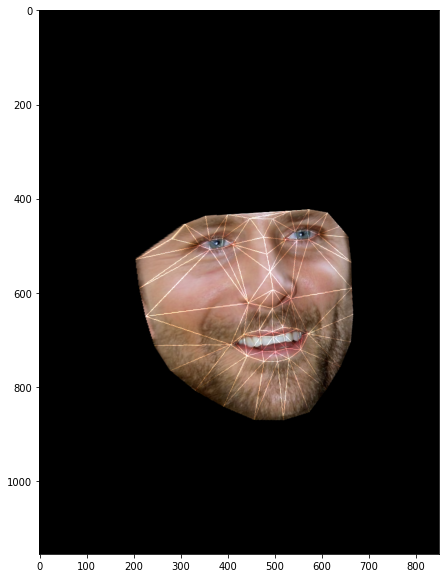

In [487]:
#lets do for firs traingle
jim_copy=jim.copy()
jim_mask_black=np.zeros_like(jim_copy)
bradley_copy=bradley.copy()
plt.figure(figsize=(12,10))

for pts in indexes_triangles:
  #first image
    pt1_im1=landmark_points[pts[0]]
    pt2_im1=landmark_points[pts[1]]
    pt3_im1=landmark_points[pts[2]]
    # cv2.line(bradley_copy,pt1_im1,pt2_im1,(0,255,0),3)
    # cv2.line(bradley_copy,pt2_im1,pt3_im1,(0,255,0),3)
    # cv2.line(bradley_copy,pt3_im1,pt1_im1,(0,255,0),3)
    triangle1=np.array([pt1_im1,pt2_im1,pt3_im1],np.int32)
    rec1=cv2.boundingRect(triangle1)
    x,y,w,h = rec1
    # cv2.rectangle(bradley_copy,(x,y),(x+w,y+h),(255,0,0),2)
    rect1_image=bradley_copy[y:y+h,x:x+w]

    points1=np.array([
       [pt1_im1[0]-x,pt1_im1[1]-y,],
       [pt2_im1[0]-x,pt2_im1[1]-y,],
       [pt3_im1[0]-x,pt3_im1[1]-y,],   
    ],np.int32)

    traingle1_mask=np.zeros((h,w),np.uint8)
    cv2.fillConvexPoly(traingle1_mask,points1,255)
    traingle1_cropped=cv2.bitwise_and(rect1_image,rect1_image,mask=traingle1_mask)
   
   
#second image
    pt1_im2=landmark_points_jim[pts[0]]
    pt2_im2=landmark_points_jim[pts[1]]
    pt3_im2=landmark_points_jim[pts[2]]
    # cv2.line(jim_copy,pt1_im2,pt2_im2,(0,255,0),3)
    # cv2.line(jim_copy,pt2_im2,pt3_im2,(0,255,0),3)
    # cv2.line(jim_copy,pt3_im2,pt1_im2,(0,255,0),3)  
    triangle2=np.array([pt1_im2,pt2_im2,pt3_im2],np.int32)
    rec2=cv2.boundingRect(triangle2)
    x,y,w,h = rec2
    # cv2.rectangle(jim_copy,(x,y),(x+w,y+h),(255,0,0),2)
    rect2_image=jim_copy[y:y+h,x:x+w]
    points2=np.array([
       [pt1_im2[0]-x,pt1_im2[1]-y,],
       [pt2_im2[0]-x,pt2_im2[1]-y,],
       [pt3_im2[0]-x,pt3_im2[1]-y,],   
    ],np.int32)
    traingle2_mask=np.zeros((h,w),np.uint8)
    cv2.fillConvexPoly(traingle2_mask,points2,255)
    traingle2_cropped=cv2.bitwise_and(rect2_image,rect2_image,mask=traingle2_mask)
    
      # Warp triangles
    points1 = np.float32(points1)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points1, points2)
    warped_triangle = cv2.warpAffine(traingle1_cropped, M, (w, h))
    newTraingle=cv2.add(jim_mask_black[y:y+h,x:x+w],warped_triangle)
    jim_mask_black[y:y+h,x:x+w]=newTraingle
 
plt.imshow(jim_mask_black)
plt.show()

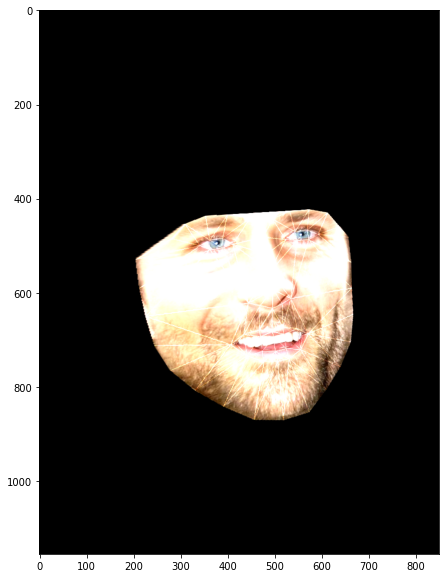

In [490]:
aa=cv2.add(jim_mask_black,jim_mask_black)
plt.figure(figsize=(12,10))
plt.imshow(aa)

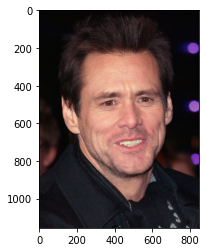

In [470]:
plt.imshow(jim_copy)

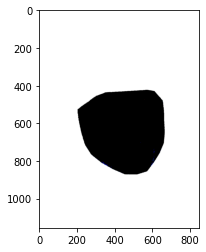

In [471]:
_,jim_mask_thresh=cv2.threshold(jim_mask_black,1,255,cv2.THRESH_BINARY_INV)
plt.imshow(jim_mask_thresh)

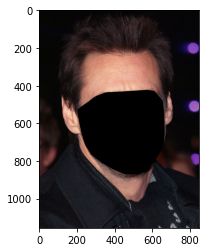

In [472]:
finalImage=cv2.bitwise_and(jim_copy,jim_mask_thresh)
plt.imshow(finalImage)

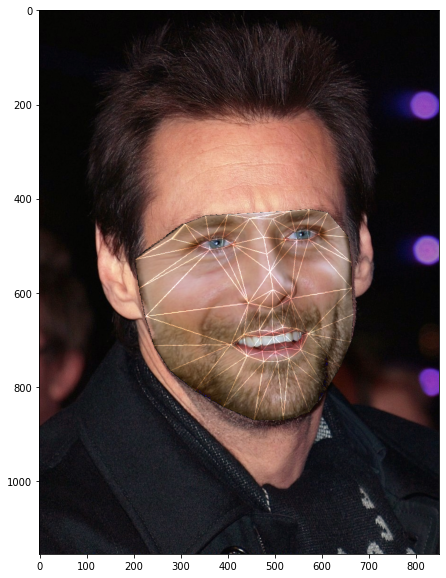

In [473]:
finalImage=cv2.bitwise_or(finalImage,jim_mask_black)
plt.figure(figsize=(12,10))
plt.imshow(finalImage)

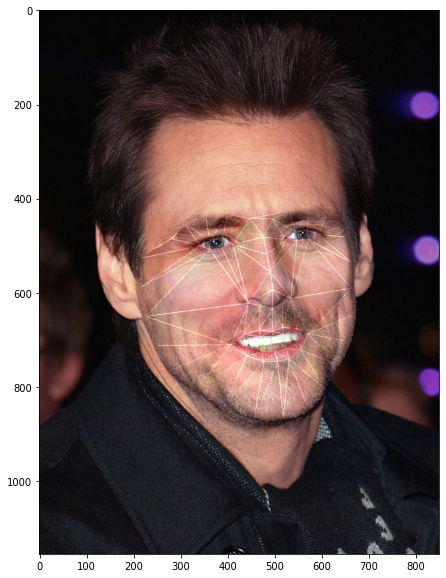

In [491]:
(x, y, w, h) = cv2.boundingRect(convexHull_jim)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))
seamlessclone = cv2.seamlessClone(finalImage, jim, jimMask, center_face2, cv2.MIXED_CLONE)
plt.figure(figsize=(12,10))
plt.imshow(seamlessclone)